# <font color='gold'> ***Análise Exploratória: Incêndios Florestais Brasileiros*** </font> 🔥🌳

# <font color='gold'> ***Objetivos da Análise*** 🎯 </font>
---

Nesse projeto, realizaremos uma Analise Exploratória de Dados (EDA) em um [banco de dados](https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil) que contém uma série histórica de incêndios florestais no Brasil em diferentes estados. Mais especificamente, desse projeto iremos:

- 🎲 Realizar uma análise descritiva das características principais dos dados, como suas dimensões, seus registros e tipos de dados, valores nulos e outliers, etc;

- 🧹 Limpar e tratar os dados;

- 📊 Utilizar de visualizações gráficas para geração de insights e análises mais aprofundadas acerca dos incêndios e suas características.

Como questões centrais que abordaremos nessa pesquisa, temos:

>***1. Quais os estados e regiões mais afetados por incêndios durante toda a série histórica?***
>
>***2. Durante qual período de qual governante brasileiro tivemos mais incêndios no Brasil? e qual o menor valor?***

Entre outras questões que serão abordadas durante o projeto.

# <font color='gold'>***Importando Pacotes e Conhecendo Dados*** 📦🎲</font>
---

In [1136]:
# Importando bibliotecas necessárias para a análise:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import seaborn as sns
import warnings

# Definindo parâmetros:

# Setando estilo escuro do grid para os gráficos.
sns.set_theme(context='notebook', style='darkgrid')

# Utilizando a biblioteca warnings para retirar avisos da execução do código
# para uma visualização mais limpa.
warnings.filterwarnings('ignore')

# Mostrando versões utilizadas dos pacotes:
print('Pacotes Prontos! Versões Utilizadas:\n')
print(f'Pandas      --> {pd.__version__}')
print(f'Numpy       --> {np.__version__}')
print(f'Matplotlib  --> {matplotlib.__version__}')
print(f'Seaborn     --> {sns.__version__}')

Pacotes Prontos! Versões Utilizadas:

Pandas      --> 1.4.2
Numpy       --> 1.21.5
Matplotlib  --> 3.6.2
Seaborn     --> 0.11.2


In [1137]:
# Criando o Dataframe:
data = pd.read_csv('data/amazon.csv', sep=',', encoding='latin-1')

<font color='gold'> ⚠️**Nota** </font>

>A seleção do encoding como [latin-1](https://www.ic.unicamp.br/~stolfi/EXPORT/www/ISO-8859-1-Encoding.html) foi utilizada pois existem caracteres especiais nos dados, assim, a definição do enconding específico foi necessária (em vez do padrão UTF-8).

In [1138]:
# Visualizando primeiros 5 registros dos dados:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [1139]:
# Visualizando uma sample aleatória dos dados:
data.sample(5)

,year,state,month,number,date
2399,2006,Mato Grosso,Janeiro,947.000,2006-01-01
5401,2000,Roraima,Agosto,9.000,2000-01-01
3903,2016,Pernambuco,Abril,8.000,2016-01-01
3985,1998,Pernambuco,Setembro,177.000,1998-01-01
2548,2015,Mato Grosso,Agosto,5.112,2015-01-01


Para termos uma compreensão clara de nossos dados, iremos criar um dicionário de variáveis contendo as colunas do Dataset e a descrição de seu conteúdo:

| Variável   | Conteúdo                                 |
|------------|------------------------------------------|
| `year`     | Ano em que o incêndio florestal ocorreu  |
| `state`    | Estado brasileiro                        |
| `month`    | Mês em que o incêndio ocorreu            |
| `number`   | Quantidade de incêndios reportados       |
| `date`     | Data em que o incêndio foi reportado     |

Com alguns dos registros aparentes, uma característica notável é a aparente duplicata nas colunas. 

- A coluna `year`, que representa o ano em que o incêndio ocorreu e a coluna `date` que informa a data em que o incêndio foi reportado, aparentam possuir os mesmos dados:

    - Quando a coluna year apresenta o ano de 1998, a coluna date informa a data 1998-01-01, e esse padrão da coluna date apenas repetir a coluna year com a adição das datas "1 de Janeiro" se mostra presente em todo dataset como mostrado pelo uso do comando `data.sample(5)`.

Dessa forma, iremos arranjar essas informações de uma maneira diferente:

- Substituir os valores da coluna `month` por nomes em Inglês;

- Dropar a coluna `date` pois utilizaremos a coluna `year` e `month` separadamente;

- Checar o Data type da coluna `year` e constatar se precisa ser alterado.

Como outros ajustes, também iremos renomear as colunas para que tenham a primeira letra maiúscula. Também iremos inserir algumas novas colunas para fortalecer as análises, tendo essas etapas ocorrendo na etapa de limpeza e tratamento dos dados.

Para uma visão mais completa das dimensões dos dados que estamos trabalhando, vamos checar o shape do Dataset:

In [1140]:
# Checando dimensões dos dados:
data.shape

(6454, 5)

Temos ***6454 registros*** em ***5 variáveis***.

Também se faz necessária a checagem do tipo de dados dessas variáveis:

In [1141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


Com essa visualização, temos algumas informações importantes sobre os dados:

- O dataset não possui null values;

- A coluna `year` está em int64, sendo que o range de valores é de 1998 até 2017, o que significa que podemos alterar esse data type para int16, assim consumindo menos memória na execução dos dados.

Para coletarmos mais informações sobre possíveis outliers e também sobre a distribuição dos dados, utilizaremos o método `.describe()`:

In [1142]:
# Descrição estatística dos dados (colunas numéricas):
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,6454.0,2007.461729,5.746654,1998.0,2002.0,2007.0,2012.0,2017.0
number,6454.0,108.293163,190.812242,0.0,3.0,24.0,113.0,998.0


Com a descrição estatística das colunas numéricas do dataset, podemos notar:

- Até 75% dos dados (terceiro quantil) relacionados ao número de incêndios relatados vão até 113, já o valor máximo é de 998, um outlier claro.

Nesse caso, outliers são esperados como "normais", pois se tratando de número de focos de incêndios florestais num país continental como o Brasil, não existe uma regra ou uma lógica exata que dita o intervalo desses números, tendo muitas variávies que os influenciam (ação humana mais intensa ou menos intensa numa determinada região num determinado período de tempo, uma estação do ano muito mais fria ou quente do que o normal, etc).

Sendo assim, os registros de número de focos de incêndio não serão alterados, pois buscamos ter uma visão completa desses dados.

Também iremos coletar informações sobre as colunas categóricas do dataset:

In [1143]:
# Descrição estatística dos dados (colunas categóricas):
data.describe(exclude='number').T

,count,unique,top,freq
state,6454,23,Rio,717
month,6454,12,Janeiro,541
date,6454,20,1998-01-01,324


Com isso, temos a informação de que o estado que mais vezes consta no dataset é o Rio de Janeiro, com 717 registros diferentes de focos de incêndio.

Também temos a informação de que o mês mais comum nos dados é Janeiro.

É importante termos em mente que isso não necessariamente significa que o estado do Rio de Janeiro e o mês de Janeiro são os que mais possuem focos de incêndio no geral. Apenas estamos indicando que essas duas informações são as mais presentes nos dados, sem considerarmos a dimensão e quantidade dos focos de incêndio atribuidos a eles.

# <font color='gold'> ***Limpeza e Tratamento*** 🗃️ </font>
---

Nessa etapa, iremos realizar todas as modificações e tratamentos que descrevemos anteriormente. Começando pelo refatoramento das colunas `year`, `date` e `month`. Para isso, iremos primeiramente definir uma função para iterar sobre nossos dados e passar os meses de Português para Inglês:

## **Reformulando formato de data**:

In [1144]:
def month_translator(df: pd.DataFrame) -> pd.DataFrame:
    '''Essa função pega um Dataframe fornecido pelo usuário e altera
    os valores dos meses de Português para Inglês.

    Utilizando uma função lambda, checamos cada string dos meses, onde cada
    uma delas recebe o nome apropriado.
    '''
    df['month'] = df['month'].apply(
        lambda month_id:
        'Jan' if month_id == 'Janeiro' else
        'Feb' if month_id == 'Fevereiro' else
        'Mar' if month_id == 'Março' else
        'Apr' if month_id == 'Abril' else
        'May' if month_id == 'Maio' else
        'Jun' if month_id == 'Junho' else
        'Jul' if month_id == 'Julho' else
        'Aug' if month_id == 'Agosto' else
        'Sep' if month_id == 'Setembro' else
        'Oct' if month_id == 'Outubro' else
        'Nov' if month_id == 'Novembro' else
        'Dec' if month_id == 'Dezembro' else
        month_id
    )   


Antes de iniciarmos as modificações nos dados, é uma boa prática criar uma cópia dos mesmos, assim se preservam os dados no formato original e se cria outra versão para a limpeza e manipulação:

In [1145]:
# Criando cópia dos dados para limpeza:
data_clean = data.copy()

In [1146]:
# Aplicando a função no dataset:
data_clean == month_translator(data_clean)

# Exibindo novos resultados:
data_clean.sample(5)

,year,state,month,number,date
2416,2003,Mato Grosso,Feb,592.000,2003-01-01
0,1998,Acre,Jan,0.000,1998-01-01
2212,1998,Maranhao,Apr,0.000,1998-01-01
5193,2011,Rondonia,Sep,1.782,2011-01-01
5550,2010,Santa Catarina,Mar,9.000,2010-01-01


Agora que temos meses em Inglês, vamos dropar a coluna `date` e ajustar o data type da coluna `year`:

In [1147]:
# Excluindo coluna date:
data_clean = data_clean.drop('date', axis=1)

In [1148]:
# Ajustando data type da coluna year:
data_clean = data_clean.astype({
    'year': 'int16'
})

In [1149]:
# Checando novo formato dos dados:
data_clean.sample(5)

,year,state,month,number
997,1998,Bahia,Mar,0.0
3936,2009,Pernambuco,Jun,1.0
4610,2006,Rio,Apr,2.0
926,2006,Amazonas,Nov,59.0
1008,2009,Bahia,Mar,249.0


In [1150]:
# Checando novos dtypes:
data_clean.dtypes

year        int16
state      object
month      object
number    float64
dtype: object

## **Criando novas variáveis**

Com os dados no formato atual, já se é possível realizar algumas análises, porém, visamos nesse projeto uma visão mais aprofundada dos incêndios florestais no Brasil, e por essa razão se faz necessária a criação de algumas novas variáveis para nossos dados, sendo elas:

- Coluna `UF` > A coluna que representará a Unidade da Federação do estado (SP, RJ, BA, etc). Essa coluna será criada pois os nomes dos estados não podem ser confiados de estarem no formato adequado para criação de Dashboards e análises, como exemplo, o estado do Rio de Janeiro apenas consta com o nome 'Rio' no dataset. Sendo assim, a criação da coluna UF vem como forma de padronizar esses indicadores de estado.

- Coluna `Region` > A coluna que representará a região brasileira na qual o estado pertence (Norte, Sul, Sudeste, etc). Essa coluna será concebida como forma de aprofundar as análises posteriores, nos possibilitando ter respostas acerca de quais regiões foram mais e menos afetadas pelos incêndios.

- Coluna `President` > A coluna que representará o nome de qual mandatário brasileiro estava em vigência quando os incêndios ocorreram. Essa coluna nos permitirá ter um olhar mais histórico acerca desses registros, onde poderemos comparar as diferentes gestões dos diversos mandatários nesses períodos e identificar quais passaram por um período de mais ou menos incêndios.

- Coluna `Season` > A coluna que representará em qual estação do ano o incêndio florestal ocorreu. Ela servirá para aprofundarmos mais as análises e compreendermos a correlação entre estações do ano e incêndios florestais.

### Criando coluna: UF

Para a criação da coluna `UF`, iremos criar uma função que percorre os dados e atribui a UF correta para seu respectivo estado, para isso, vamos checar quais são os estados presentes no Dataset:

In [1151]:
# Checando quais estados aparecem nos dados:
states = list(data_clean['state'].unique())

for (index, names) in enumerate(states, start=1):
    print(f'Estado {index:2} --> {names}')

Estado  1 --> Acre
Estado  2 --> Alagoas
Estado  3 --> Amapa
Estado  4 --> Amazonas
Estado  5 --> Bahia
Estado  6 --> Ceara
Estado  7 --> Distrito Federal
Estado  8 --> Espirito Santo
Estado  9 --> Goias
Estado 10 --> Maranhao
Estado 11 --> Mato Grosso
Estado 12 --> Minas Gerais
Estado 13 --> Pará
Estado 14 --> Paraiba
Estado 15 --> Pernambuco
Estado 16 --> Piau
Estado 17 --> Rio
Estado 18 --> Rondonia
Estado 19 --> Roraima
Estado 20 --> Santa Catarina
Estado 21 --> Sao Paulo
Estado 22 --> Sergipe
Estado 23 --> Tocantins


É aparente que nem todos os estados da nação estão presentes nos dados. Temos 23 estados diferentes porém o Brasil possuí 27 unidades federativas. 

Outro fator relevante é o registro errado do estado de Piauí, que consta apenas como 'Piau'. Esse registro errado apenas fortalece o motivo da qual estamos criando a coluna UF, para padronizar esses dados e garantir que todos estão corretamente representados.

Antes de definir nossa função de criação das UFs, vamos corrigir essa entrada do estado de Piauí e também adicionar o nome completo do estado do Rio de Janeiro:

In [1152]:
# Corrigindo registros de Rio de Janeiro e Piauí:
data_clean['state'] = (
    data_clean['state']
    .replace(['Rio', 'Piau'], ['Rio de Janeiro', 'Piaui'])
)

# Checando os novos registros:
data_clean.query('state == "Rio de Janeiro" | state == "Piaui"').sample(5)

,year,state,month,number
4841,1998,Rio de Janeiro,Apr,0.0
4153,2007,Piaui,May,52.0
5006,2003,Rio de Janeiro,Dec,98.0
4343,1998,Rio de Janeiro,Mar,0.0
4722,1998,Rio de Janeiro,Oct,55.0


Com os estados presentes nos dados de maneira correta, podemos definir nossa função de atribuição das UFs:

In [1153]:
def set_uf(df: pd.DataFrame) -> pd.DataFrame:
    '''Essa função recebe um dataframe, itera sobre os registros e
    atribui aos estados suas respectivas UFs.
    
    Para isso, criamos um dicionário que contém o par 'estado: UF' e 
    e atribuímos diretamente esses valores a nova coluna.
    '''
    state_uf = {
        'Acre': 'AC',
        'Alagoas': 'AL',
        'Amapa': 'AP',
        'Amazonas': 'AM',
        'Bahia': 'BA',
        'Ceara': 'CE',
        'Distrito Federal': 'DF',
        'Espirito Santo': 'ES',
        'Goias': 'GO',
        'Maranhao': 'MA',
        'Mato Grosso': 'MT',
        'Minas Gerais': 'MG',
        'Pará': 'PA',
        'Paraiba': 'PB',
        'Pernambuco': 'PE',
        'Piaui': 'PI',
        'Rio de Janeiro': 'RJ',
        'Rondonia': 'RO',
        'Roraima': 'RR',
        'Santa Catarina': 'SC',
        'Sao Paulo': 'SP',
        'Sergipe': 'SE',
        'Tocantins': 'TO'
    }

    df['UF'] = df['state'].map(state_uf)

    return df

In [1154]:
# Aplicando a função:
data_clean = set_uf(data_clean)

# Exibindo resultados:
data_clean.sample(5)

,year,state,month,number,UF
2785,2013,Mato Grosso,Aug,677.000,MT
5931,2012,Sao Paulo,Oct,206.000,SP
1284,2006,Ceara,May,0.000,CE
4086,2000,Piaui,Feb,12.000,PI
2616,2003,Mato Grosso,Dec,1.622,MT


### Criando coluna: Region

Para adicionar as regiões de cada estado, vamos criar uma função que itera sobre os registros e atribui a cada estado sua devida região:

In [1155]:
def set_region(df: pd.DataFrame) -> pd.DataFrame:
    '''Essa função adiciona as regiões dos respectivos
    estados com base em sua UF.
    
    Delimita-se uma lista com os estados para cada região e utiliza-se
    uma função lambda para aplicar ao dataset.
    '''
    regiao_norte = ['AC', 'AP', 'AM', 'PA', 'RO', 'RR', 'TO']
    regiao_nordeste = ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'SE']
    regiao_centro_oeste = ['DF', 'GO', 'MT']
    regiao_sudeste = ['ES', 'MG', 'RJ', 'SP']
    regiao_sul = ['SC']

    df['Region'] = df['UF'].apply(
        lambda state:
        'Norte' if state in regiao_norte else
        'Nordeste' if state in regiao_nordeste else
        'Centro Oeste' if state in regiao_centro_oeste else
        'Sudeste' if state in regiao_sudeste else
        'Sul' if state in regiao_sul else
        state
    )

    return df

In [1156]:
# Aplicando a função:
data_clean = set_region(data_clean)

# Checando novos dados:
data_clean.sample(5)

,year,state,month,number,UF,Region
4154,2008,Piaui,May,12.0,PI,Nordeste
1456,1999,Distrito Federal,Feb,2.0,DF,Centro Oeste
1059,2000,Bahia,Jun,178.0,BA,Nordeste
556,2015,Amapa,Apr,0.0,AP,Norte
4989,2006,Rio de Janeiro,Nov,27.0,RJ,Sudeste


### Criando coluna: President

Para podermos inserir nos dados o mandatário vigente durante os registros de incêndio florestal, primeiro iremos checar o intervalo de tempo que temos nos dados:

In [1157]:
# Checando intervalo de anos:
print(f'Ano mínimo: {data_clean.year.min()}')
print(f'Ano máximo: {data_clean.year.max()}')

Ano mínimo: 1998
Ano máximo: 2017


Com os anos definidos, utilizando uma [lista com todos os mandatários](https://pt.wikipedia.org/wiki/Lista_de_presidentes_do_Brasil) do Brasil, iremos atribuí-los aos respectivos períodos que constam nos dados. Para isso, utilizaremos uma função:

In [1158]:
def set_president(df: pd.DataFrame) -> pd.DataFrame:
    '''Essa função itera sobre os anos do dataset e atribuí a uma nova coluna
    o nome do mandatário vigente durante esse período.
    '''
    df['President'] = df['year'].apply(
        lambda year:
        'FHC' if (year >= 1998) and (year <= 2002) else
        'Lula' if (year >= 2003) and (year <= 2010) else
        'Dilma' if (year >= 2011) and (year <= 2016) else
        'Temer'
    )

    return df


In [1159]:
# Aplicando a função:
data_clean = set_president(data_clean)

# Visualizando novos resultados:
data_clean.sample(5)

,year,state,month,number,UF,Region,President
1719,2003,Espirito Santo,Mar,28.0,ES,Sudeste,Lula
3490,2001,Paraiba,Aug,34.0,PB,Nordeste,FHC
651,2010,Amapa,Sep,63.0,AP,Norte,Lula
4953,2010,Rio de Janeiro,Sep,250.0,RJ,Sudeste,Lula
3585,2016,Paraiba,Dec,8.0,PB,Nordeste,Dilma


### Criando coluna: Season

Para podermos compreender ainda mais a periodicidade dos incêndios florestais, vamos criar uma coluna que informa em qual estação do ano o registro do incêndio ocorreu. Para isso, vamos criar a seguinte função:

In [1160]:
def set_season(df: pd.DataFrame) -> pd.DataFrame:
    '''Essa função itera sobre o Dataframe e cria uma nova coluna
    para estações do ano com base no mês em que o registro foi feito.
    '''
    spring = ['Mar', 'Apr', 'May']
    summer = ['Jun', 'Jul', 'Aug']
    autumn = ['Sep', 'Oct', 'Nov']
    winter = ['Dec', 'Jan', 'Feb']

    df['Season'] = df['month'].apply(
        lambda month:
        'Spring' if month in spring else
        'Summer' if month in summer else
        'Autumn' if month in autumn else
        'Winter' if month in winter else
        month
    )

    return df

In [1161]:
# Aplicando a função:
data_clean = set_season(data_clean)

# Visualizando novos resultados:
data_clean.sample(5)

,year,state,month,number,UF,Region,President,Season
4751,2007,Rio de Janeiro,Nov,130.0,RJ,Sudeste,Lula,Autumn
5336,2015,Roraima,Apr,278.0,RR,Norte,Dilma,Spring
2697,2005,Mato Grosso,Apr,126.0,MT,Centro Oeste,Lula,Spring
428,2006,Alagoas,Oct,32.0,AL,Nordeste,Lula,Autumn
5284,2003,Roraima,Feb,767.0,RR,Norte,Lula,Winter


Com todas as colunas necessárias criadas para as análises, vamos realizar os últimos ajustes nos dados, isto é, renomear as colunas e reposicioná-las no dataset:

### Renomeando e Reposicionando Colunas

In [1162]:
# Renomeando colunas utilizando um dicionário:
data_clean = data_clean.rename(columns={
    'year': 'Year',
    'state': 'State',
    'month': 'Month',
    'number': 'Num_wild_fires'
})

# Reposicionando colunas:
data_clean = data_clean.loc[
    :, 
    ['State', 'UF', 'Region', 
    'Num_wild_fires', 'Year', 'Month', 'Season', 'President']
]
# Visualizando novos dados:
data_clean.head()

,State,UF,Region,Num_wild_fires,Year,Month,Season,President
0,Acre,AC,Norte,0.0,1998,Jan,Winter,FHC
1,Acre,AC,Norte,0.0,1999,Jan,Winter,FHC
2,Acre,AC,Norte,0.0,2000,Jan,Winter,FHC
3,Acre,AC,Norte,0.0,2001,Jan,Winter,FHC
4,Acre,AC,Norte,0.0,2002,Jan,Winter,FHC


Com as colunas nomeadas e reorganizadas temos uma padronização melhor, onde elas descrevem bem o conteúdo das variáveis e também, iniciam-se com letra maiúscula.

# <font color='gold'> ***Análises e Plots*** 📊 </font>
---

Com os dados devidamente tratados, podemos dar início as análises e plotagens gráficas. Como perguntas centrais a serem respondidas, teremos:

***<font color='gold'>1.</font> Quais os estados e regiões mais e menos afetados por incêndios durante toda a série histórica?***

***<font color='gold'>2.</font> Durante qual período de qual governante brasileiro tivemos mais e menos incêndios no Brasil?***

***<font color='gold'>3.</font> Como o número de incêndios nos diferentes estados se relacionam entre si ao longo da série histórica?***

***<font color='gold'>4.</font> Qual a estação do ano em que se houve mais e menos incêndios no Brasil?***

## <font color='gold'>1.</font> Quais os estados e regiões mais e menos afetados por incêndios durante toda a série histórica?

Para podermos compreender quais foram os estados e regiões mais e menos afetados por incêndios florestais na série histórica, primeiro vamos criar um rankeamento dos estados e das regiões:

### Rankeamento dos Estados

In [1165]:
# Agrupando dados para rankeamento dos estados:
states_rank = (
    data_clean
    .groupby('State')['Num_wild_fires']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(
        columns={
            'State': 'Estado',
            'Num_wild_fires': 'Total de Incêndios'
        }
    )
)

# Visualizando ranking:
states_rank.style.background_gradient( # Definindo um gradiente nos valores
    subset='Total de Incêndios',
    cmap='YlOrRd'
)

,Estado,Total de Incêndios
0,Mato Grosso,96246.028000
1,Paraiba,52435.918000
2,Sao Paulo,51121.198000
3,Rio de Janeiro,45160.865000
4,Bahia,44746.226000
5,Piaui,37803.747000
6,Goias,37695.520000
7,Minas Gerais,37475.258000
8,Tocantins,33707.885000
9,Amazonas,30650.129000


Com a tabela já temos como identificar as respostas que queríamos:

- O estado mais afetado pelos incêndios é de longe `Minas Gerais` com cerca de 960 mil registros na série histórica, seguido pelo estado da `Paraíba` bem atrás com cerca de 524 mil registros.

- Já o estado menos afetado na série histórica é `Sergipe` com apenas 3237 registros.

Para termos uma vizualização mais apropriada para os dados, utilizaremos das bibliotecas Matplotlib e Seaborn:

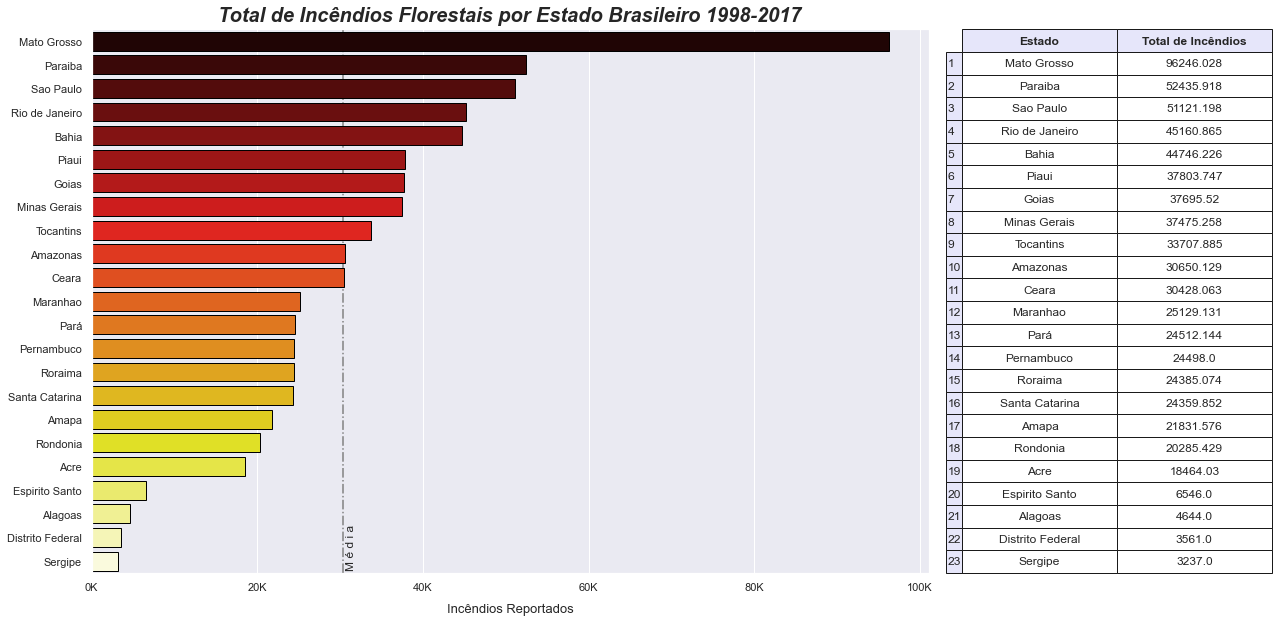

In [1173]:
# Definindo parâmetros de tamanho:
fig, ax = plt.subplots(figsize=(15, 10))

# Plotando um barplot utilizando Seaborn:
sns.barplot(
    data=states_rank, 
    x='Total de Incêndios', 
    y='Estado',
    edgecolor='black', 
    zorder=2, 
    palette='hot'
)

# Definindo título e ajustando labels nos eixos X e Y:
plt.title(
    'Total de Incêndios Florestais por Estado Brasileiro 1998-2017', 
    fontsize=20, 
    fontweight='bold', 
    fontstyle='italic', 
    pad='8.0'
)

plt.xlabel(
    'Incêndios Reportados', 
    fontsize=13, 
    labelpad=10
)

ax.set_xticklabels(['0K', '20K', '40K', '60K', '80K', '100K'])
plt.ylabel('')

# Adicionando linha de média:
plt.axvline(
    x = states_rank['Total de Incêndios'].mean(), 
    ymin = 0, 
    ymax = 1,
    linewidth = 1.5, 
    linestyle ="dashdot",
    color ='gray', 
    zorder=1
)

plt.annotate(
    'M é d i a', 
    fontsize=12, 
    xy=(states_rank['Total de Incêndios'].mean() + 300, 22.3), 
    rotation=90
)

# Adicionando tabela com dados:
row_color = np.full(len(states_rank.index), 'lavender')
col_color = np.full(len(states_rank.columns), 'lavender')
row_index = np.arange(1, 24)

table = plt.table(
        cellText=states_rank.values,
        cellLoc='center',
        rowLabels=row_index,
        colLabels=states_rank.columns,
        bbox=[1.04, 0, 0.37, 1],
        rowColours=row_color,
        colColours=col_color,
    )

table.set_fontsize(12)

# Alterando propriedades dos headers das colunas:
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))       

plt.show()

### Rankeamento das Regiões

In [1170]:
# Agrupando dados para rankeamento das regiões:
region_rank = (
    data_clean
    .groupby('Region')['Num_wild_fires']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
    .rename(
        columns={
            'Region': 'Região',
            'Num_wild_fires': 'Total de Incêndios'
        }
    )
)

# Visualizando ranking:
region_rank.style.background_gradient( # Definindo um gradiente nos valores
    subset='Total de Incêndios',
    cmap='YlOrRd'
)

,Região,Total de Incêndios
0,Nordeste,222922.085000
1,Norte,173836.267000
2,Sudeste,140303.321000
3,Centro Oeste,137502.548000
4,Sul,24359.852000


Podemos ver que mesmo que o estado de Minas Gerais é disparado o que mais teve registros de incêndios florestais nos dados, a `Região Nordeste` foi a que teve mais incêndios no geral. Isso é importante para destacar que uma abordagem única para uma questão nunca é boa, pois pode esconder dados relevantes. Nesse caso, se não tivessemos buscado compreender tanto qual estado tanto qual região possuiu o maior número de incêndios, poderiamos ficar com a impressão de que, por causa do estado do Mato Grosso ser de longe o com mais registros, a região Centro Oeste seria a mais afetada, o que nosso rankeamento por regiões desprova.

Como mesmo procedimento, iremos plotar o mesmo gráfico de barras porém agora para as regiões:

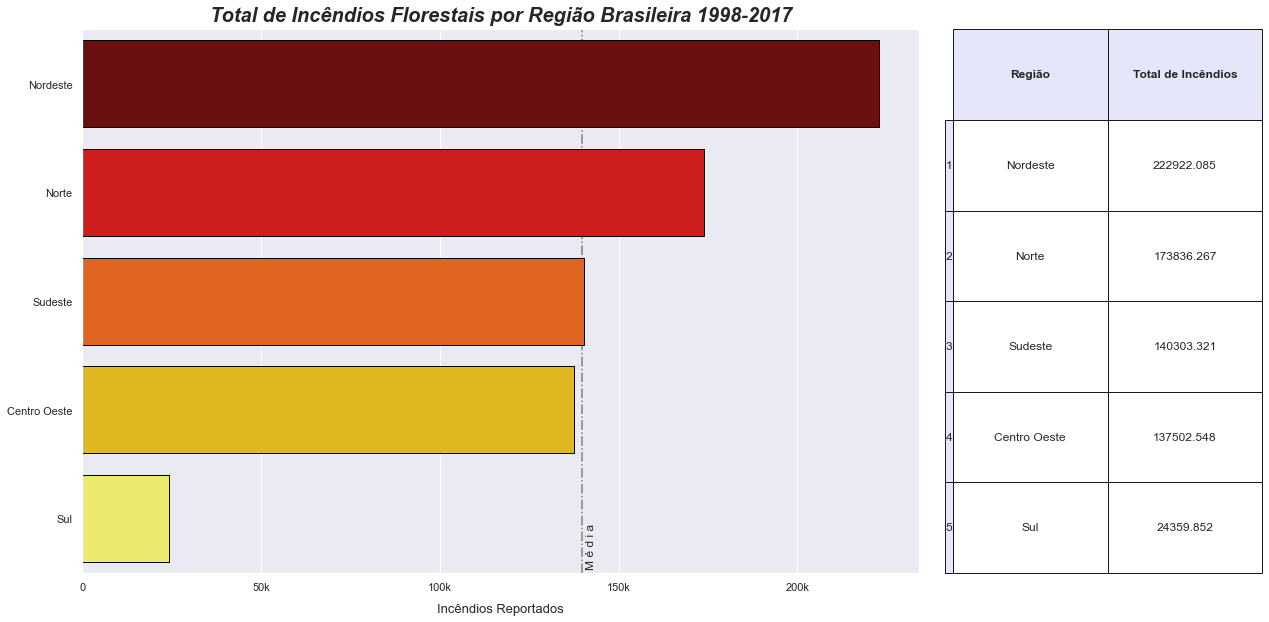

In [1207]:
# Definindo parâmetros de tamanho:
fig, ax = plt.subplots(figsize=(15, 10))

# Plotando um barplot utilizando Seaborn:
sns.barplot(
    data=region_rank, 
    x='Total de Incêndios', 
    y='Região',
    edgecolor='black', 
    zorder=2, 
    palette='hot'
)

# Definindo título e ajustando labels nos eixos X e Y:
plt.title(
    'Total de Incêndios Florestais por Região Brasileira 1998-2017', 
    fontsize=20, 
    fontweight='bold', 
    fontstyle='italic', 
    pad='8.0'
)

plt.xlabel(
    'Incêndios Reportados', 
    fontsize=13, 
    labelpad=10
)

ax.set_xticklabels(['0', '50k', '100k', '150k', '200k'])
plt.ylabel('')

# Adicionando linha de média:
plt.axvline(
    x = region_rank['Total de Incêndios'].mean(), 
    ymin = 0, 
    ymax = 1,
    linewidth = 1.5, 
    linestyle ="dashdot",
    color ='gray', 
    zorder=1
)

plt.annotate(
    'M é d i a', 
    fontsize=12, 
    xy=(region_rank['Total de Incêndios'].mean() + 1000, 4.45), 
    rotation=90
)

# Adicionando tabela com dados:
row_color = np.full(len(region_rank.index), 'lavender')
col_color = np.full(len(region_rank.columns), 'lavender')
row_index = np.arange(1, 6)

table = plt.table(
        cellText=region_rank.values,
        cellLoc='center',
        rowLabels=row_index,
        colLabels=region_rank.columns,
        bbox=[1.04, 0, 0.37, 1],
        rowColours=row_color,
        colColours=col_color,
    )

table.set_fontsize(12)

# Alterando propriedades dos headers das colunas:
for (row, col), cell in table.get_celld().items():
    if row == 0:
        cell.set_text_props(fontproperties=FontProperties(weight='bold'))       

plt.show()